# Checking Accidents With and Without Red Light camera

In [1]:
# Add Matplotlib inline magic command
%matplotlib notebook
%matplotlib inline
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#importing files
all_collision=pd.read_csv("../Resources/df_all_collision.csv")
seriously_injured=pd.read_csv("../Resources/df_seriously_injured.csv",low_memory=False)
red_light_camera=pd.read_csv("../Resources/df_red_light_camera.csv")

In [3]:
#creating copy of data
red_light_camera_df=red_light_camera.copy()
seriously_injured_df=seriously_injured.copy()
all_collision_df=all_collision.copy()

In [4]:
pd.options.display.max_columns = None         # to print all columns

# MERGE1: TO GET DATA FOR AREAS WITH RED LIGHT CAMERAS ONLY

In [5]:
#Checking data before merging
red_light_camera_df.head()

,ACTIVATION_DATE,NAME,DISTRICT,RLC,Longitude,Latitude,Month,Year
0,2007-11-09,Richmond St E And Parliament St,Toronto and East York,6001,-79.3640,43.6545,November,2007
1,2007-11-09,Lake Shore Blvd W And York St,Toronto and East York,6002,-79.3808,43.6414,November,2007
2,2007-11-09,Steeles Ave W And Carpenter Rd / Private Acces...,North York,6003,-79.4475,43.7920,November,2007
3,2007-11-09,Steeles Ave W And Hilda Ave,North York,6004,-79.4292,43.7960,November,2007
4,2007-11-09,Albion Rd And Silverstone Dr,Etobicoke York,6005,-79.6000,43.7429,November,2007


In [6]:
#Getting red_light_camera_df info
red_light_camera_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ACTIVATION_DATE  214 non-null    object 
 1   NAME             214 non-null    object 
 2   DISTRICT         214 non-null    object 
 3   RLC              214 non-null    int64  
 4   Longitude        214 non-null    float64
 5   Latitude         214 non-null    float64
 6   Month            214 non-null    object 
 7   Year             214 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 13.5+ KB


In [7]:
#Checking data before merging
seriously_injured_df.head()

,ACCNUM,INVTYPE,INVAGE,INJURY_ID,VEHTYPE,SPEEDING,REDLIGHT,ALCOHOL,YEAR,DATE,TIME,HOUR,STREET1,STREET2,ROAD_CLASS_ID,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,Longitude,Latitude,Month,Day_of_Week
0,25301,Driver,75 to 79,1.0,"Automobile, Station Wagon",NaN,NaN,NaN,2020,2020-01-04,1850,18,EGLINTON AVE E,BAYVIEW AVE,1.0,Intersection,Traffic Signal,Rain,Dark,Wet,Non-Fatal Injury,Pedestrian Collisions,-79.3771,43.7109,January,Saturday
1,26294,Pedestrian,65 to 69,2.0,NaN,NaN,NaN,NaN,2020,2020-01-04,2214,22,256 JARVIS ST,NaN,1.0,Mid-Block,No Control,Clear,"Dark, artificial",Dry,Fatal,Pedestrian Collisions,-79.3755,43.6595,January,Saturday
2,37330,Driver,50 to 54,1.0,"Automobile, Station Wagon",NaN,NaN,NaN,2020,2020-01-06,1555,15,DUNDAS ST W,SHERIDAN AVE,3.0,Intersection,Traffic Signal,Clear,"Dawn, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,-79.4336,43.6496,January,Monday
3,45664,Driver,50 to 54,5.0,"Automobile, Station Wagon",NaN,NaN,NaN,2020,2020-01-07,1850,18,EGLINTON AVE E,PHARMACY AVE,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Turning Movement,-79.2974,43.7255,January,Tuesday
4,56815,Driver,45 to 49,1.0,Delivery Van,Yes,Yes,NaN,2020,2020-01-09,1100,11,MARTIN GROVE RD,BELFIELD RD,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Angle,-79.5755,43.7018,January,Thursday


In [8]:
#Getting info about seriously_injured_df
seriously_injured_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001 entries, 0 to 6000
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ACCNUM         6001 non-null   int64  
 1   INVTYPE        5993 non-null   object 
 2   INVAGE         6001 non-null   object 
 3   INJURY_ID      5309 non-null   float64
 4   VEHTYPE        5583 non-null   object 
 5   SPEEDING       710 non-null    object 
 6   REDLIGHT       376 non-null    object 
 7   ALCOHOL        231 non-null    object 
 8   YEAR           6001 non-null   int64  
 9   DATE           6001 non-null   object 
 10  TIME           6001 non-null   int64  
 11  HOUR           6001 non-null   int64  
 12  STREET1        6001 non-null   object 
 13  STREET2        5425 non-null   object 
 14  ROAD_CLASS_ID  5837 non-null   float64
 15  LOCCOORD       5963 non-null   object 
 16  TRAFFCTL       5992 non-null   object 
 17  VISIBILITY     5992 non-null   object 
 18  LIGHT   

In [9]:
#Removed columns with very less data(they are important fields but not enough data for analysis)
seriously_injured_df.drop(["SPEEDING","REDLIGHT","ALCOHOL"], axis=1, inplace=True)
seriously_injured_df.head()

,ACCNUM,INVTYPE,INVAGE,INJURY_ID,VEHTYPE,YEAR,DATE,TIME,HOUR,STREET1,STREET2,ROAD_CLASS_ID,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,Longitude,Latitude,Month,Day_of_Week
0,25301,Driver,75 to 79,1.0,"Automobile, Station Wagon",2020,2020-01-04,1850,18,EGLINTON AVE E,BAYVIEW AVE,1.0,Intersection,Traffic Signal,Rain,Dark,Wet,Non-Fatal Injury,Pedestrian Collisions,-79.3771,43.7109,January,Saturday
1,26294,Pedestrian,65 to 69,2.0,NaN,2020,2020-01-04,2214,22,256 JARVIS ST,NaN,1.0,Mid-Block,No Control,Clear,"Dark, artificial",Dry,Fatal,Pedestrian Collisions,-79.3755,43.6595,January,Saturday
2,37330,Driver,50 to 54,1.0,"Automobile, Station Wagon",2020,2020-01-06,1555,15,DUNDAS ST W,SHERIDAN AVE,3.0,Intersection,Traffic Signal,Clear,"Dawn, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,-79.4336,43.6496,January,Monday
3,45664,Driver,50 to 54,5.0,"Automobile, Station Wagon",2020,2020-01-07,1850,18,EGLINTON AVE E,PHARMACY AVE,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Turning Movement,-79.2974,43.7255,January,Tuesday
4,56815,Driver,45 to 49,1.0,Delivery Van,2020,2020-01-09,1100,11,MARTIN GROVE RD,BELFIELD RD,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Angle,-79.5755,43.7018,January,Thursday


In [10]:
#Inner Join to get common from both tge dataframes
merge_redlight_seriouslyinjured=pd.merge(red_light_camera_df, seriously_injured_df,how='inner',on=['Longitude','Latitude'])
merge_redlight_seriouslyinjured

,ACTIVATION_DATE,NAME,DISTRICT,RLC,Longitude,Latitude,Month_x,Year,ACCNUM,INVTYPE,INVAGE,INJURY_ID,VEHTYPE,YEAR,DATE,TIME,HOUR,STREET1,STREET2,ROAD_CLASS_ID,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,Month_y,Day_of_Week
0,2007-11-09,Lake Shore Blvd W And York St,Toronto and East York,6002,-79.3808,43.6414,November,2007,1339123,Driver,35 to 39,1.0,"Automobile, Station Wagon",2012,2012-12-11,535,5,LAKE SHORE BLVD W,YORK ST,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,December,Tuesday
1,2007-11-09,Lake Shore Blvd W And York St,Toronto and East York,6002,-79.3808,43.6414,November,2007,4001700272,Driver,20 to 24,1.0,"Automobile, Station Wagon",2014,2014-03-14,1545,15,YORK ST,YORK ST GARDINER W RAMP,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,March,Friday
2,2007-11-09,Steeles Ave W And Carpenter Rd / Private Acces...,North York,6003,-79.4475,43.7920,November,2007,1196444,Vehicle Owner,unknown,NaN,Other,2010,2010-10-21,1315,13,STEELES AVE W,CARPENTER RD,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,October,Thursday
3,2007-11-09,Steeles Ave W And Hilda Ave,North York,6004,-79.4292,43.7960,November,2007,2260605,Driver,30 to 34,1.0,"Automobile, Station Wagon",2020,2020-11-29,2200,22,STEELES AVE W,HILDA AVE,1.0,Intersection,Traffic Signal,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,November,Sunday
4,2007-11-09,Albion Rd And Silverstone Dr,Etobicoke York,6005,-79.6000,43.7429,November,2007,910951,Driver,30 to 34,1.0,"Automobile, Station Wagon",2006,2006-06-13,2124,21,SILVERSTONE DR,ALBION RD,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,June,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2021-09-30,Evans Ave And Horner Ave,Etobicoke York,6246,-79.5188,43.6169,September,2021,9001113942,Cyclist,50 to 54,4.0,Bicycle,2019,2019-06-16,1710,17,EVANS AVE,HORNER AVE,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Cyclist Collisions,June,Sunday
265,2022-03-17,O Connor Dr And Pape Ave,Toronto and East York,6255,-79.3502,43.6932,March,2022,957966,Vehicle Owner,unknown,NaN,"Automobile, Station Wagon",2007,2007-03-09,1724,17,O CONNOR DR,PAPE AVE,1.0,Intersection,Traffic Signal,Clear,Dusk,Dry,Fatal,Pedestrian Collisions,March,Friday
266,2022-03-17,O Connor Dr And Pape Ave,Toronto and East York,6255,-79.3502,43.6932,March,2022,1276036,Driver,25 to 29,1.0,"Automobile, Station Wagon",2011,2011-12-10,1533,15,O CONNOR DR,PAPE AVE,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,December,Saturday
267,2022-03-30,Meadowvale Rd And Dean Park Rd / Generation Blvd,Scarborough,6256,-79.1687,43.8042,March,2022,3000989119,Driver,60 to 64,4.0,"Automobile, Station Wagon",2013,2013-11-17,1506,15,MEADOWVALE RD,DEAN PARK RD,3.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Angle,November,Sunday


In [11]:
merge_redlight_seriouslyinjured.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 0 to 268
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ACTIVATION_DATE  269 non-null    object 
 1   NAME             269 non-null    object 
 2   DISTRICT         269 non-null    object 
 3   RLC              269 non-null    int64  
 4   Longitude        269 non-null    float64
 5   Latitude         269 non-null    float64
 6   Month_x          269 non-null    object 
 7   Year             269 non-null    int64  
 8   ACCNUM           269 non-null    int64  
 9   INVTYPE          269 non-null    object 
 10  INVAGE           269 non-null    object 
 11  INJURY_ID        241 non-null    float64
 12  VEHTYPE          257 non-null    object 
 13  YEAR             269 non-null    int64  
 14  DATE             269 non-null    object 
 15  TIME             269 non-null    int64  
 16  HOUR             269 non-null    int64  
 17  STREET1         

In [12]:
#Changing data type of DATE column to datetime
merge_redlight_seriouslyinjured['DATE'] = pd.to_datetime(merge_redlight_seriouslyinjured['DATE'])

In [13]:
#Extracting Week from Date
merge_redlight_seriouslyinjured["Day_of_Week"]=merge_redlight_seriouslyinjured["DATE"].dt.day_name()

In [14]:
merge_redlight_seriouslyinjured.head()

,ACTIVATION_DATE,NAME,DISTRICT,RLC,Longitude,Latitude,Month_x,Year,ACCNUM,INVTYPE,INVAGE,INJURY_ID,VEHTYPE,YEAR,DATE,TIME,HOUR,STREET1,STREET2,ROAD_CLASS_ID,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,Month_y,Day_of_Week
0,2007-11-09,Lake Shore Blvd W And York St,Toronto and East York,6002,-79.3808,43.6414,November,2007,1339123,Driver,35 to 39,1.0,"Automobile, Station Wagon",2012,2012-12-11,535,5,LAKE SHORE BLVD W,YORK ST,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,December,Tuesday
1,2007-11-09,Lake Shore Blvd W And York St,Toronto and East York,6002,-79.3808,43.6414,November,2007,4001700272,Driver,20 to 24,1.0,"Automobile, Station Wagon",2014,2014-03-14,1545,15,YORK ST,YORK ST GARDINER W RAMP,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,March,Friday
2,2007-11-09,Steeles Ave W And Carpenter Rd / Private Acces...,North York,6003,-79.4475,43.7920,November,2007,1196444,Vehicle Owner,unknown,NaN,Other,2010,2010-10-21,1315,13,STEELES AVE W,CARPENTER RD,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,October,Thursday
3,2007-11-09,Steeles Ave W And Hilda Ave,North York,6004,-79.4292,43.7960,November,2007,2260605,Driver,30 to 34,1.0,"Automobile, Station Wagon",2020,2020-11-29,2200,22,STEELES AVE W,HILDA AVE,1.0,Intersection,Traffic Signal,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,November,Sunday
4,2007-11-09,Albion Rd And Silverstone Dr,Etobicoke York,6005,-79.6000,43.7429,November,2007,910951,Driver,30 to 34,1.0,"Automobile, Station Wagon",2006,2006-06-13,2124,21,SILVERSTONE DR,ALBION RD,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,June,Tuesday


In [15]:
#RENAMING MONTH COLUMNS FROM BOTH MERGED DATAFRAMES
merge_redlight_seriouslyinjured.rename(columns={"Month_x":"Month_RLC","Month_y":"Month"},inplace=True)
merge_redlight_seriouslyinjured

,ACTIVATION_DATE,NAME,DISTRICT,RLC,Longitude,Latitude,Month_RLC,Year,ACCNUM,INVTYPE,INVAGE,INJURY_ID,VEHTYPE,YEAR,DATE,TIME,HOUR,STREET1,STREET2,ROAD_CLASS_ID,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,Month,Day_of_Week
0,2007-11-09,Lake Shore Blvd W And York St,Toronto and East York,6002,-79.3808,43.6414,November,2007,1339123,Driver,35 to 39,1.0,"Automobile, Station Wagon",2012,2012-12-11,535,5,LAKE SHORE BLVD W,YORK ST,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,December,Tuesday
1,2007-11-09,Lake Shore Blvd W And York St,Toronto and East York,6002,-79.3808,43.6414,November,2007,4001700272,Driver,20 to 24,1.0,"Automobile, Station Wagon",2014,2014-03-14,1545,15,YORK ST,YORK ST GARDINER W RAMP,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,March,Friday
2,2007-11-09,Steeles Ave W And Carpenter Rd / Private Acces...,North York,6003,-79.4475,43.7920,November,2007,1196444,Vehicle Owner,unknown,NaN,Other,2010,2010-10-21,1315,13,STEELES AVE W,CARPENTER RD,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,October,Thursday
3,2007-11-09,Steeles Ave W And Hilda Ave,North York,6004,-79.4292,43.7960,November,2007,2260605,Driver,30 to 34,1.0,"Automobile, Station Wagon",2020,2020-11-29,2200,22,STEELES AVE W,HILDA AVE,1.0,Intersection,Traffic Signal,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,November,Sunday
4,2007-11-09,Albion Rd And Silverstone Dr,Etobicoke York,6005,-79.6000,43.7429,November,2007,910951,Driver,30 to 34,1.0,"Automobile, Station Wagon",2006,2006-06-13,2124,21,SILVERSTONE DR,ALBION RD,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,June,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2021-09-30,Evans Ave And Horner Ave,Etobicoke York,6246,-79.5188,43.6169,September,2021,9001113942,Cyclist,50 to 54,4.0,Bicycle,2019,2019-06-16,1710,17,EVANS AVE,HORNER AVE,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Cyclist Collisions,June,Sunday
265,2022-03-17,O Connor Dr And Pape Ave,Toronto and East York,6255,-79.3502,43.6932,March,2022,957966,Vehicle Owner,unknown,NaN,"Automobile, Station Wagon",2007,2007-03-09,1724,17,O CONNOR DR,PAPE AVE,1.0,Intersection,Traffic Signal,Clear,Dusk,Dry,Fatal,Pedestrian Collisions,March,Friday
266,2022-03-17,O Connor Dr And Pape Ave,Toronto and East York,6255,-79.3502,43.6932,March,2022,1276036,Driver,25 to 29,1.0,"Automobile, Station Wagon",2011,2011-12-10,1533,15,O CONNOR DR,PAPE AVE,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,December,Saturday
267,2022-03-30,Meadowvale Rd And Dean Park Rd / Generation Blvd,Scarborough,6256,-79.1687,43.8042,March,2022,3000989119,Driver,60 to 64,4.0,"Automobile, Station Wagon",2013,2013-11-17,1506,15,MEADOWVALE RD,DEAN PARK RD,3.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Angle,November,Sunday


In [16]:
merge_redlight_seriouslyinjured.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 0 to 268
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ACTIVATION_DATE  269 non-null    object        
 1   NAME             269 non-null    object        
 2   DISTRICT         269 non-null    object        
 3   RLC              269 non-null    int64         
 4   Longitude        269 non-null    float64       
 5   Latitude         269 non-null    float64       
 6   Month_RLC        269 non-null    object        
 7   Year             269 non-null    int64         
 8   ACCNUM           269 non-null    int64         
 9   INVTYPE          269 non-null    object        
 10  INVAGE           269 non-null    object        
 11  INJURY_ID        241 non-null    float64       
 12  VEHTYPE          257 non-null    object        
 13  YEAR             269 non-null    int64         
 14  DATE             269 non-null    datetime6

In [17]:
#Year by total number of accidents WITH Red Light Camera
df_redlightaccident_by_year=pd.DataFrame(merge_redlight_seriouslyinjured.groupby(["YEAR"],as_index=False)["ACCNUM"].count())
df_redlightaccident_by_year

,YEAR,ACCNUM
0,2006,34
1,2007,16
2,2008,15
3,2009,21
4,2010,17
5,2011,12
6,2012,24
7,2013,25
8,2014,20
9,2015,32


<AxesSubplot:xlabel='YEAR'>

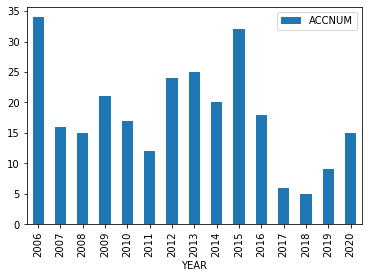

In [18]:
#Creating bar chart to for year to total accidents
df_redlightaccident_by_year.plot(x="YEAR", y="ACCNUM",kind="bar")

In [19]:
#Month by total number of accidents WITH Red Light Camera
df_redlightaccident_by_month=pd.DataFrame(merge_redlight_seriouslyinjured.groupby(["Month"],as_index=False)["ACCNUM"].count())
df_redlightaccident_by_month

,Month,ACCNUM
0,April,30
1,August,30
2,December,19
3,February,13
4,January,17
5,July,19
6,June,30
7,March,17
8,May,17
9,November,23


<AxesSubplot:xlabel='Month'>

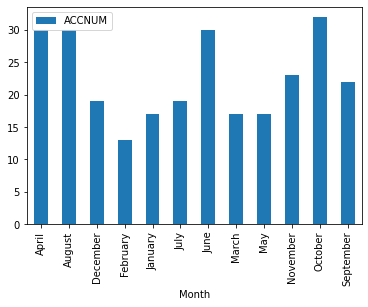

In [20]:
#Creating bar chart to for month to total accidents
df_redlightaccident_by_month.plot(x="Month", y="ACCNUM",kind="bar")

In [21]:
#Total number of accidents by Days of Week WITH Red Light Camera
df_hourofthedayaccident=pd.DataFrame(merge_redlight_seriouslyinjured.groupby(["HOUR"])["ACCNUM"].count())
df_hourofthedayaccident

,ACCNUM
HOUR,
0,12
1,3
2,4
3,10
4,1
5,4
6,12
7,9
8,4


<AxesSubplot:xlabel='HOUR'>

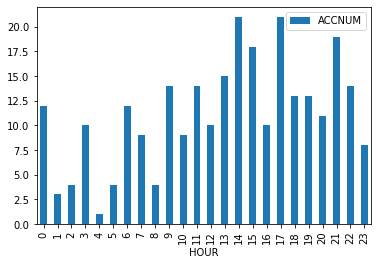

In [22]:
#Creating bar chart to for Hours of day to total accidents
df_hourofthedayaccident.plot(kind="bar")

In [23]:
#Total number of accidents by Involvement Type WITH Red Light Camera
df_involvement_type=pd.DataFrame(merge_redlight_seriouslyinjured.groupby("INVTYPE",as_index=False)["ACCNUM"].count())
df_involvement_type

,INVTYPE,ACCNUM
0,Cyclist,5
1,Driver,175
2,Moped Driver,1
3,Motorcycle Driver,11
4,Other,3
5,Passenger,27
6,Pedestrian,9
7,Truck Driver,5
8,Vehicle Owner,33


In [24]:
#Total number of accidents by Visibility and Accident Classification WITH Red Light Camera
df_visibility=pd.DataFrame(merge_redlight_seriouslyinjured.groupby(["VISIBILITY","ACCLASS"],as_index=False)["ACCNUM"].count())
df_visibility

,VISIBILITY,ACCLASS,ACCNUM
0,Clear,Fatal,27
1,Clear,Non-Fatal Injury,200
2,Freezing Rain,Non-Fatal Injury,1
3,Other,Non-Fatal Injury,1
4,Rain,Fatal,3
5,Rain,Non-Fatal Injury,34
6,Snow,Non-Fatal Injury,3


<AxesSubplot:xlabel='ACCLASS'>

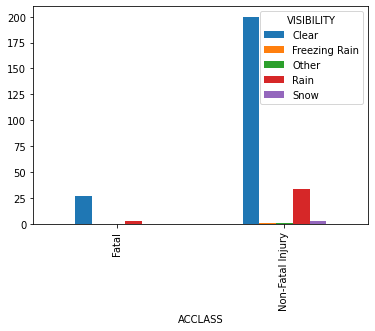

In [25]:
#Creating bar chart for Visibility
df_visibility.pivot_table(index="ACCLASS",columns="VISIBILITY").plot(kind="bar",y="ACCNUM")

In [26]:
#Total number of accidents by Road Condition and Accident Classification WITH Red Light Camera
df_roadcondition=pd.DataFrame(merge_redlight_seriouslyinjured.groupby(["RDSFCOND","ACCLASS"],as_index=False)["ACCNUM"].count())
df_roadcondition

,RDSFCOND,ACCLASS,ACCNUM
0,Dry,Fatal,25
1,Dry,Non-Fatal Injury,188
2,Loose Snow,Non-Fatal Injury,2
3,Slush,Non-Fatal Injury,1
4,Wet,Fatal,5
5,Wet,Non-Fatal Injury,48


<AxesSubplot:xlabel='ACCLASS'>

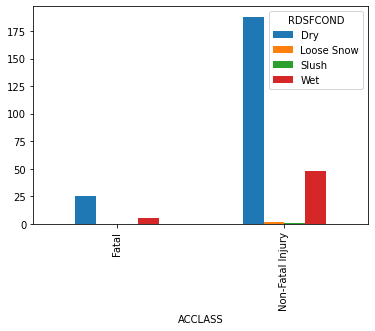

In [27]:
#Creating Bar chart for road condition
df_roadcondition.pivot_table(index="ACCLASS",columns="RDSFCOND").plot(kind="bar",y="ACCNUM")

In [28]:
#Total number of accidents by Light and Accident Classification WITH Red Light Camera
df_light=pd.DataFrame(merge_redlight_seriouslyinjured.groupby(["LIGHT","ACCLASS"],as_index=False)["ACCNUM"].count())
df_light

,LIGHT,ACCLASS,ACCNUM
0,Dark,Fatal,6
1,Dark,Non-Fatal Injury,46
2,"Dark, artificial",Fatal,5
3,"Dark, artificial",Non-Fatal Injury,49
4,Dawn,Fatal,1
5,Dawn,Non-Fatal Injury,3
6,Daylight,Fatal,16
7,Daylight,Non-Fatal Injury,133
8,"Daylight, artificial",Non-Fatal Injury,1
9,Dusk,Fatal,2


<AxesSubplot:xlabel='ACCLASS'>

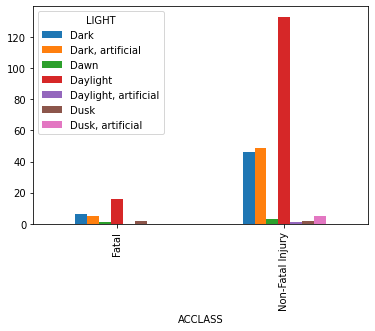

In [29]:
#Creating Bar chart for Light
df_light.pivot_table(index="ACCLASS",columns="LIGHT").plot(kind="bar",y="ACCNUM")

In [30]:
#Total number of accidents by Impact Type WITH Red Light Camera
df_impact_type=pd.DataFrame(merge_redlight_seriouslyinjured.groupby(["IMPACTYPE"],as_index=False)["ACCNUM"].count())
df_impact_type

,IMPACTYPE,ACCNUM
0,Angle,48
1,Approaching,2
2,Cyclist Collisions,18
3,Other,2
4,Pedestrian Collisions,109
5,Rear End,18
6,SMV Other,7
7,Sideswipe,3
8,Turning Movement,62


<AxesSubplot:xlabel='IMPACTYPE'>

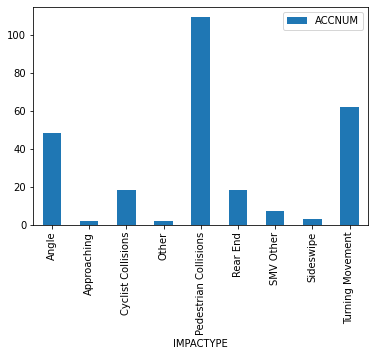

In [31]:
#Creating bar chart for IMPACT Type
df_impact_type.plot("IMPACTYPE","ACCNUM",kind="bar")

# CREATING HEADMAP OF ACCIDENT DATA BY YEAR AND MONTH

In [32]:
def RTAs_by_month(df, month):
    month_list = []
    mon, tues, wed, thurs, fri, sat, sun = 0,0,0,0,0,0,0
    
    for idx, row in df.iterrows():
        if row["Month"] == month and row["Day_of_Week"] == "Monday": mon +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Tuesday": tues +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Wednesday": wed +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Thursday": thurs +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Friday": fri +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Saturday": sat +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Sunday": sun +=1
        else: a=0 

    month_list.append(mon)
    month_list.append(tues)
    month_list.append(wed)
    month_list.append(thurs)
    month_list.append(fri)
    month_list.append(sat)
    month_list.append(sun)
    
    total = mon+tues+wed+thurs+fri+sat+sun
    
    return(month_list)

In [33]:
#Extract RTA data for each day by month
january = RTAs_by_month(merge_redlight_seriouslyinjured, "January")
february = RTAs_by_month(merge_redlight_seriouslyinjured, "February")
march = RTAs_by_month(merge_redlight_seriouslyinjured, "March")
april = RTAs_by_month(merge_redlight_seriouslyinjured, "April")
may = RTAs_by_month(merge_redlight_seriouslyinjured, "May")
june = RTAs_by_month(merge_redlight_seriouslyinjured, "June")
july = RTAs_by_month(merge_redlight_seriouslyinjured, "July")
august = RTAs_by_month(merge_redlight_seriouslyinjured, "August")
september = RTAs_by_month(merge_redlight_seriouslyinjured, "September")
october = RTAs_by_month(merge_redlight_seriouslyinjured, "October")
november = RTAs_by_month(merge_redlight_seriouslyinjured, "November")
december = RTAs_by_month(merge_redlight_seriouslyinjured, "December")

In [34]:
#Create matrix for the heatmap
columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
rows = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
data = np.array([january, february, march, april, may, june, july, august, september, october, november, december])
heatmap_df = pd.DataFrame(data=data, index=rows, columns=columns)

In [35]:
heatmap_df

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
January,3,3,1,1,3,1,5
February,2,1,3,2,0,2,3
March,3,1,2,2,3,5,1
April,3,4,4,5,2,6,6
May,2,1,5,1,4,4,0
June,2,5,2,5,1,7,8
July,2,4,1,3,3,4,2
August,6,5,3,5,4,4,3
September,4,1,2,5,3,4,3
October,8,2,5,4,5,3,5


Text(0.5, 1.0, 'Traffic Accidents WITH RED LIGHT CAMERA by week for each month from 2014-2020')

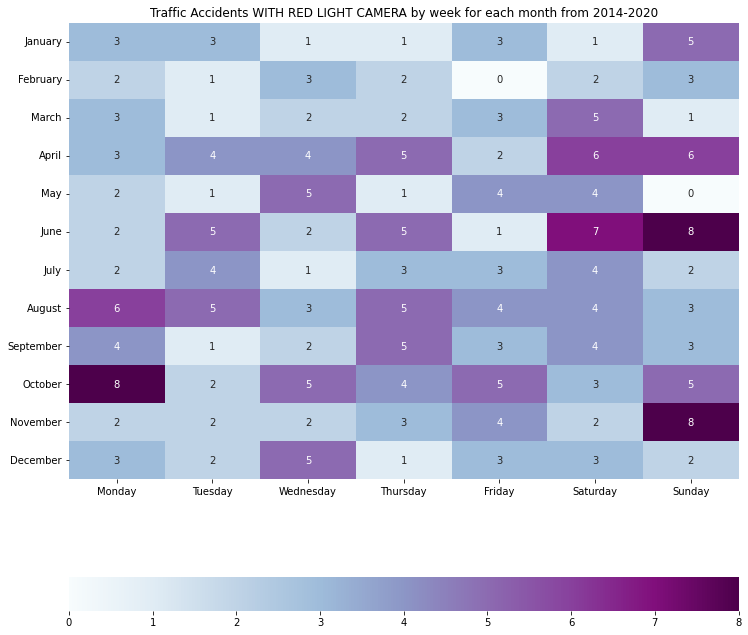

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
map1 = sns.heatmap(heatmap_df, annot=True, fmt="d", cmap='BuPu', cbar_kws={"orientation": "horizontal"} )
map1.set_title("Traffic Accidents WITH RED LIGHT CAMERA by week for each month from 2014-2020")

# MERGE2 - Get data Without Red Light Camera

In [37]:
#Merged table using RIGHT JOIN to get the data without red light camera
no_red_light_camera=pd.merge(red_light_camera_df, seriously_injured_df,how='right',on=['Longitude','Latitude'])
no_red_light_camera

,ACTIVATION_DATE,NAME,DISTRICT,RLC,Longitude,Latitude,Month_x,Year,ACCNUM,INVTYPE,INVAGE,INJURY_ID,VEHTYPE,YEAR,DATE,TIME,HOUR,STREET1,STREET2,ROAD_CLASS_ID,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,Month_y,Day_of_Week
0,NaN,NaN,NaN,NaN,-79.3771,43.7109,NaN,NaN,25301,Driver,75 to 79,1.0,"Automobile, Station Wagon",2020,2020-01-04,1850,18,EGLINTON AVE E,BAYVIEW AVE,1.0,Intersection,Traffic Signal,Rain,Dark,Wet,Non-Fatal Injury,Pedestrian Collisions,January,Saturday
1,NaN,NaN,NaN,NaN,-79.3755,43.6595,NaN,NaN,26294,Pedestrian,65 to 69,2.0,NaN,2020,2020-01-04,2214,22,256 JARVIS ST,NaN,1.0,Mid-Block,No Control,Clear,"Dark, artificial",Dry,Fatal,Pedestrian Collisions,January,Saturday
2,NaN,NaN,NaN,NaN,-79.4336,43.6496,NaN,NaN,37330,Driver,50 to 54,1.0,"Automobile, Station Wagon",2020,2020-01-06,1555,15,DUNDAS ST W,SHERIDAN AVE,3.0,Intersection,Traffic Signal,Clear,"Dawn, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,January,Monday
3,NaN,NaN,NaN,NaN,-79.2974,43.7255,NaN,NaN,45664,Driver,50 to 54,5.0,"Automobile, Station Wagon",2020,2020-01-07,1850,18,EGLINTON AVE E,PHARMACY AVE,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Turning Movement,January,Tuesday
4,NaN,NaN,NaN,NaN,-79.5755,43.7018,NaN,NaN,56815,Driver,45 to 49,1.0,Delivery Van,2020,2020-01-09,1100,11,MARTIN GROVE RD,BELFIELD RD,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Angle,January,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6004,NaN,NaN,NaN,NaN,-79.5166,43.7532,NaN,NaN,9002496688,Pedestrian,10 to 14,4.0,NaN,2019,2019-12-27,2324,23,2901 JANE ST,NaN,1.0,Mid-Block,No Control,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,December,Friday
6005,NaN,NaN,NaN,NaN,-79.4489,43.6765,NaN,NaN,9002500056,Driver,40 to 44,1.0,"Automobile, Station Wagon",2019,2019-12-28,1439,14,1325 ST CLAIR AVE W,NaN,1.0,Mid-Block,No Control,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,December,Saturday
6006,NaN,NaN,NaN,NaN,-79.3848,43.6584,NaN,NaN,9002500260,Driver,50 to 54,1.0,"Automobile, Station Wagon",2019,2019-12-28,1514,15,GERRARD ST W,BAY ST,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,December,Saturday
6007,NaN,NaN,NaN,NaN,-79.5707,43.6915,NaN,NaN,9002501134,Driver,20 to 24,1.0,"Automobile, Station Wagon",2019,2019-12-28,1740,17,MARTIN GROVE RD,DIXON RD,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,December,Saturday


In [38]:
no_red_light_camera.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6009 entries, 0 to 6008
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ACTIVATION_DATE  269 non-null    object 
 1   NAME             269 non-null    object 
 2   DISTRICT         269 non-null    object 
 3   RLC              269 non-null    float64
 4   Longitude        6009 non-null   float64
 5   Latitude         6009 non-null   float64
 6   Month_x          269 non-null    object 
 7   Year             269 non-null    float64
 8   ACCNUM           6009 non-null   int64  
 9   INVTYPE          6001 non-null   object 
 10  INVAGE           6009 non-null   object 
 11  INJURY_ID        5316 non-null   float64
 12  VEHTYPE          5591 non-null   object 
 13  YEAR             6009 non-null   int64  
 14  DATE             6009 non-null   object 
 15  TIME             6009 non-null   int64  
 16  HOUR             6009 non-null   int64  
 17  STREET1       

In [39]:
#Changing data type of DATE column to datetime
no_red_light_camera['DATE'] = pd.to_datetime(no_red_light_camera['DATE'])

In [40]:
#Extracting Week from Date
no_red_light_camera["Day_of_Week"]=no_red_light_camera["DATE"].dt.day_name()

In [41]:
#GET THE DATA WITHOUT RED LIGHT CAMERAS where the RLC (Red Light Camera) column is null: filtering on null RLC
area_without_redlightcameras=no_red_light_camera[no_red_light_camera["RLC"].isna()]

In [42]:
#Checkimg the data
area_without_redlightcameras

,ACTIVATION_DATE,NAME,DISTRICT,RLC,Longitude,Latitude,Month_x,Year,ACCNUM,INVTYPE,INVAGE,INJURY_ID,VEHTYPE,YEAR,DATE,TIME,HOUR,STREET1,STREET2,ROAD_CLASS_ID,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,Month_y,Day_of_Week
0,NaN,NaN,NaN,NaN,-79.3771,43.7109,NaN,NaN,25301,Driver,75 to 79,1.0,"Automobile, Station Wagon",2020,2020-01-04,1850,18,EGLINTON AVE E,BAYVIEW AVE,1.0,Intersection,Traffic Signal,Rain,Dark,Wet,Non-Fatal Injury,Pedestrian Collisions,January,Saturday
1,NaN,NaN,NaN,NaN,-79.3755,43.6595,NaN,NaN,26294,Pedestrian,65 to 69,2.0,NaN,2020,2020-01-04,2214,22,256 JARVIS ST,NaN,1.0,Mid-Block,No Control,Clear,"Dark, artificial",Dry,Fatal,Pedestrian Collisions,January,Saturday
2,NaN,NaN,NaN,NaN,-79.4336,43.6496,NaN,NaN,37330,Driver,50 to 54,1.0,"Automobile, Station Wagon",2020,2020-01-06,1555,15,DUNDAS ST W,SHERIDAN AVE,3.0,Intersection,Traffic Signal,Clear,"Dawn, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,January,Monday
3,NaN,NaN,NaN,NaN,-79.2974,43.7255,NaN,NaN,45664,Driver,50 to 54,5.0,"Automobile, Station Wagon",2020,2020-01-07,1850,18,EGLINTON AVE E,PHARMACY AVE,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Turning Movement,January,Tuesday
4,NaN,NaN,NaN,NaN,-79.5755,43.7018,NaN,NaN,56815,Driver,45 to 49,1.0,Delivery Van,2020,2020-01-09,1100,11,MARTIN GROVE RD,BELFIELD RD,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Angle,January,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6004,NaN,NaN,NaN,NaN,-79.5166,43.7532,NaN,NaN,9002496688,Pedestrian,10 to 14,4.0,NaN,2019,2019-12-27,2324,23,2901 JANE ST,NaN,1.0,Mid-Block,No Control,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,December,Friday
6005,NaN,NaN,NaN,NaN,-79.4489,43.6765,NaN,NaN,9002500056,Driver,40 to 44,1.0,"Automobile, Station Wagon",2019,2019-12-28,1439,14,1325 ST CLAIR AVE W,NaN,1.0,Mid-Block,No Control,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,December,Saturday
6006,NaN,NaN,NaN,NaN,-79.3848,43.6584,NaN,NaN,9002500260,Driver,50 to 54,1.0,"Automobile, Station Wagon",2019,2019-12-28,1514,15,GERRARD ST W,BAY ST,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,December,Saturday
6007,NaN,NaN,NaN,NaN,-79.5707,43.6915,NaN,NaN,9002501134,Driver,20 to 24,1.0,"Automobile, Station Wagon",2019,2019-12-28,1740,17,MARTIN GROVE RD,DIXON RD,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,December,Saturday


In [43]:
#Year by total number of accidents WITHOUT Red Light Camera
df_noredlightaccident_by_year=pd.DataFrame(area_without_redlightcameras.groupby(["YEAR"],as_index=False)["ACCNUM"].count())
df_noredlightaccident_by_year

,YEAR,ACCNUM
0,2006,449
1,2007,439
2,2008,403
3,2009,417
4,2010,383
5,2011,387
6,2012,430
7,2013,407
8,2014,330
9,2015,319


In [44]:
#setting size of all plots using rcParams
plt.rcParams["figure.figsize"]=(6,6)

<AxesSubplot:xlabel='YEAR'>

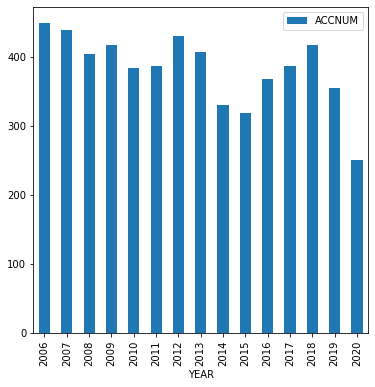

In [45]:
#Creating bar chart for total accidents by Year
df_noredlightaccident_by_year.plot(x ='YEAR', y='ACCNUM', kind = 'bar')

In [46]:
#Total number of accidents by Hour WITHOUT Red Light Camera
df_noredlightaccident_by_hour=pd.DataFrame(area_without_redlightcameras.groupby(["HOUR"])["ACCNUM"].count())
df_noredlightaccident_by_hour

,ACCNUM
HOUR,
0,161
1,141
2,157
3,125
4,60
5,100
6,192
7,201
8,238


<AxesSubplot:xlabel='HOUR'>

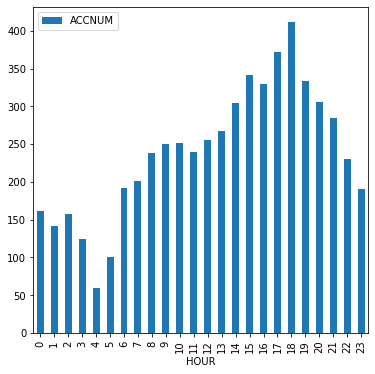

In [47]:
#Creating bar chart for total accidents by Hour of the day
df_noredlightaccident_by_hour.plot(kind = 'bar')

In [48]:
#Total number of accidents by VISIBILITY and Accident Classification WITHOUT Red Light Camera
df_visibility_noredlightcamera=pd.DataFrame(area_without_redlightcameras.groupby(["VISIBILITY","ACCLASS"],as_index=False)["ACCNUM"].count())
df_visibility_noredlightcamera

,VISIBILITY,ACCLASS,ACCNUM
0,Clear,Fatal,651
1,Clear,Non-Fatal Injury,4244
2,Drifting Snow,Non-Fatal Injury,7
3,"Fog, Mist, Smoke, Dust",Fatal,3
4,"Fog, Mist, Smoke, Dust",Non-Fatal Injury,13
5,Freezing Rain,Fatal,1
6,Freezing Rain,Non-Fatal Injury,13
7,Other,Fatal,19
8,Other,Non-Fatal Injury,21
9,Rain,Fatal,81


<AxesSubplot:xlabel='ACCLASS'>

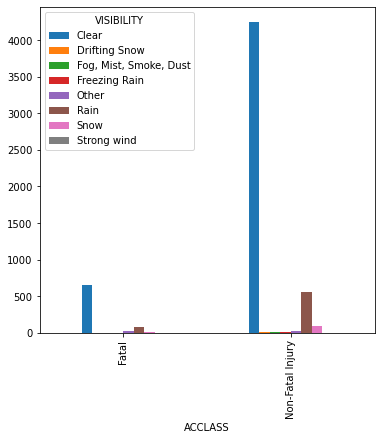

In [49]:
#Creating bar chart for Visibility
df_visibility_noredlightcamera.pivot_table(index="ACCLASS",columns="VISIBILITY").plot(kind="bar",y="ACCNUM")

In [50]:
#Total number of accidents by Road Condition and Accident Classification WITHOUT Red Light Camera
df_roadcondition_noredlightcamera=pd.DataFrame(area_without_redlightcameras.groupby(["RDSFCOND","ACCLASS"],as_index=False)["ACCNUM"].count())
df_roadcondition_noredlightcamera

,RDSFCOND,ACCLASS,ACCNUM
0,Dry,Fatal,597
1,Dry,Non-Fatal Injury,3942
2,Ice,Fatal,1
3,Ice,Non-Fatal Injury,21
4,Loose Sand or Gravel,Non-Fatal Injury,4
5,Loose Snow,Fatal,4
6,Loose Snow,Non-Fatal Injury,46
7,Other,Fatal,22
8,Other,Non-Fatal Injury,36
9,Packed Snow,Fatal,4


<AxesSubplot:xlabel='ACCLASS'>

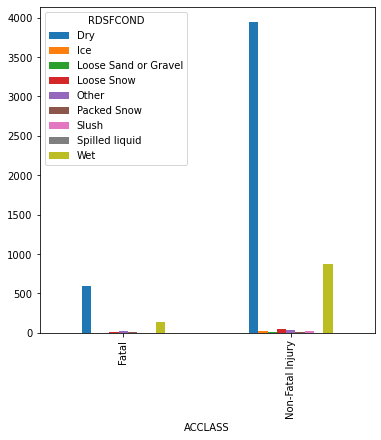

In [51]:
#Creating Bar chart for road condition
df_roadcondition_noredlightcamera.pivot_table(index="ACCLASS",columns="RDSFCOND").plot(kind="bar",y="ACCNUM")


In [52]:
#Total number of accidents by Light and Accident Classification WITHOUT Red Light Camera
df_light_noredlightcamera=pd.DataFrame(area_without_redlightcameras.groupby(["LIGHT","ACCLASS"],as_index=False)["ACCNUM"].count())
df_light_noredlightcamera

,LIGHT,ACCLASS,ACCNUM
0,Dark,Fatal,192
1,Dark,Non-Fatal Injury,961
2,"Dark, artificial",Fatal,151
3,"Dark, artificial",Non-Fatal Injury,865
4,Dawn,Fatal,4
5,Dawn,Non-Fatal Injury,29
6,"Dawn, artificial",Fatal,9
7,"Dawn, artificial",Non-Fatal Injury,29
8,Daylight,Fatal,393
9,Daylight,Non-Fatal Injury,2911


<AxesSubplot:xlabel='ACCLASS'>

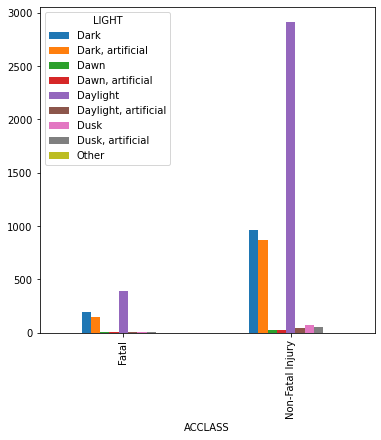

In [53]:
#Creating bar chart for LIGHT
df_light_noredlightcamera.pivot_table(index="ACCLASS",columns="LIGHT").plot(kind="bar",y="ACCNUM")

In [54]:
#Total number of accidents by Impact Type and Accident Classification WITHOUT Red Light Camera
df_impact_type_noredlightcamera=pd.DataFrame(area_without_redlightcameras.groupby(["IMPACTYPE"],as_index=False)["ACCNUM"].count())
df_impact_type_noredlightcamera

,IMPACTYPE,ACCNUM
0,Angle,262
1,Approaching,226
2,Cyclist Collisions,688
3,Other,66
4,Pedestrian Collisions,2568
5,Rear End,396
6,SMV Other,612
7,SMV Unattended Vehicle,62
8,Sideswipe,133
9,Turning Movement,726


<AxesSubplot:xlabel='IMPACTYPE'>

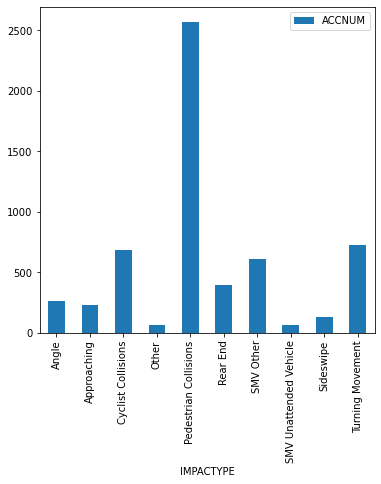

In [55]:
#Creating bar chart for IMPACT Type
df_impact_type_noredlightcamera.plot("IMPACTYPE","ACCNUM",kind="bar")

In [56]:
#Total number of accidents by Involvement Type WITHOUT Red Light Camera
df_involvement_type_noredlightcamera=pd.DataFrame(area_without_redlightcameras.groupby("INVTYPE",as_index=False)["ACCNUM"].count())
df_involvement_type_noredlightcamera

,INVTYPE,ACCNUM
0,Cyclist,162
1,Driver,3412
2,Driver - Not Hit,6
3,In-Line Skater,2
4,Moped Driver,12
5,Motorcycle Driver,337
6,Motorcycle Passenger,13
7,Other,40
8,Other Property Owner,24
9,Passenger,439


<AxesSubplot:xlabel='INVTYPE'>

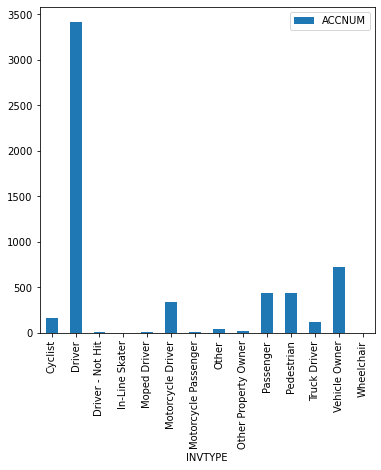

In [57]:
#Creating bar chart for Involvement Type
df_involvement_type_noredlightcamera.plot("INVTYPE","ACCNUM",kind="bar")

In [58]:
#Dropping just the columns with all NULL values in it and keeping rest of the columns
no_red_light_camera = area_without_redlightcameras.dropna(how='all')

no_red_light_camera =area_without_redlightcameras.dropna(how='all', axis=1)


In [59]:
no_red_light_camera['Month'] = no_red_light_camera['DATE'].dt.month_name()

C:\Users\aditis\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
no_red_light_camera.head()

,Longitude,Latitude,ACCNUM,INVTYPE,INVAGE,INJURY_ID,VEHTYPE,YEAR,DATE,TIME,HOUR,STREET1,STREET2,ROAD_CLASS_ID,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,Month_y,Day_of_Week,Month
0,-79.3771,43.7109,25301,Driver,75 to 79,1.0,"Automobile, Station Wagon",2020,2020-01-04,1850,18,EGLINTON AVE E,BAYVIEW AVE,1.0,Intersection,Traffic Signal,Rain,Dark,Wet,Non-Fatal Injury,Pedestrian Collisions,January,Saturday,January
1,-79.3755,43.6595,26294,Pedestrian,65 to 69,2.0,NaN,2020,2020-01-04,2214,22,256 JARVIS ST,NaN,1.0,Mid-Block,No Control,Clear,"Dark, artificial",Dry,Fatal,Pedestrian Collisions,January,Saturday,January
2,-79.4336,43.6496,37330,Driver,50 to 54,1.0,"Automobile, Station Wagon",2020,2020-01-06,1555,15,DUNDAS ST W,SHERIDAN AVE,3.0,Intersection,Traffic Signal,Clear,"Dawn, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,January,Monday,January
3,-79.2974,43.7255,45664,Driver,50 to 54,5.0,"Automobile, Station Wagon",2020,2020-01-07,1850,18,EGLINTON AVE E,PHARMACY AVE,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Turning Movement,January,Tuesday,January
4,-79.5755,43.7018,56815,Driver,45 to 49,1.0,Delivery Van,2020,2020-01-09,1100,11,MARTIN GROVE RD,BELFIELD RD,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Angle,January,Thursday,January


# CREATING HEADMAP OF ACCIDENT DATA BY YEAR AND MONTH

In [61]:
def RTAs_by_month(df, month):
    month_list = []
    mon, tues, wed, thurs, fri, sat, sun = 0,0,0,0,0,0,0
    
    for idx, row in df.iterrows():
        if row["Month"] == month and row["Day_of_Week"] == "Monday": mon +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Tuesday": tues +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Wednesday": wed +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Thursday": thurs +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Friday": fri +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Saturday": sat +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Sunday": sun +=1
        else: a=0 

    month_list.append(mon)
    month_list.append(tues)
    month_list.append(wed)
    month_list.append(thurs)
    month_list.append(fri)
    month_list.append(sat)
    month_list.append(sun)
    
    total = mon+tues+wed+thurs+fri+sat+sun
    
    return(month_list)

In [62]:
#Extract RTA data for each day by month
january = RTAs_by_month(no_red_light_camera, "January")
february = RTAs_by_month(no_red_light_camera, "February")
march = RTAs_by_month(no_red_light_camera, "March")
april = RTAs_by_month(no_red_light_camera, "April")
may = RTAs_by_month(no_red_light_camera, "May")
june = RTAs_by_month(no_red_light_camera, "June")
july = RTAs_by_month(no_red_light_camera, "July")
august = RTAs_by_month(no_red_light_camera, "August")
september = RTAs_by_month(no_red_light_camera, "September")
october = RTAs_by_month(no_red_light_camera, "October")
november = RTAs_by_month(no_red_light_camera, "November")
december = RTAs_by_month(no_red_light_camera, "December")

In [63]:
#Create matrix for the heatmap
columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
rows = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
data = np.array([january, february, march, april, may, june, july, august, september, october, november, december])
heatmap_df = pd.DataFrame(data=data, index=rows, columns=columns)

In [64]:
heatmap_df

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
January,53,75,53,52,78,51,51
February,50,50,51,53,47,54,45
March,55,52,71,51,65,53,45
April,56,61,60,48,55,53,42
May,57,75,74,75,68,64,59
June,66,94,86,92,77,76,77
July,84,66,80,70,91,56,68
August,65,85,65,83,106,89,64
September,79,90,88,79,87,81,84
October,86,75,91,83,88,68,63


Text(0.5, 1.0, 'Traffic Accidents WITHOUT RED LIGHT CAMERAS by week for each month from 2014-2020')

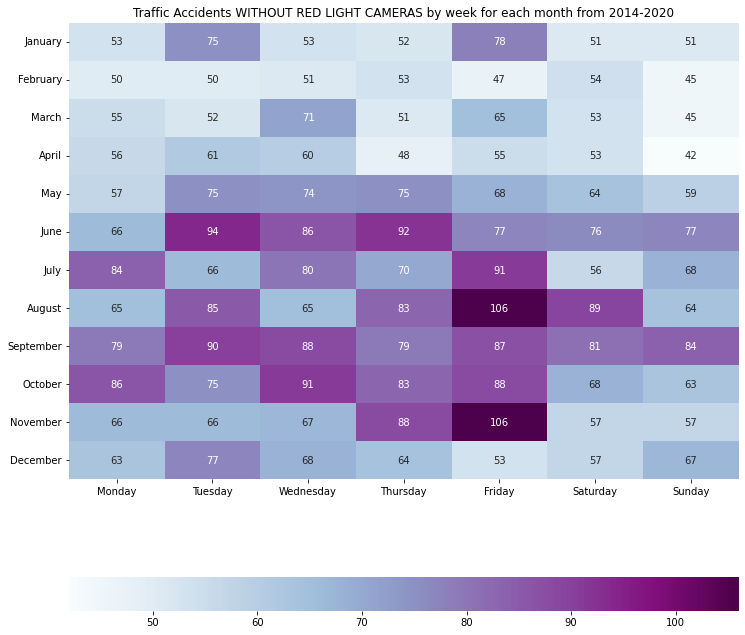

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
map1 = sns.heatmap(heatmap_df, annot=True, fmt="d", cmap='BuPu', cbar_kws={"orientation": "horizontal"} )
map1.set_title("Traffic Accidents WITHOUT RED LIGHT CAMERAS by week for each month from 2014-2020")